In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

In [6]:
cifar_mnist = datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_mnist.load_data()
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

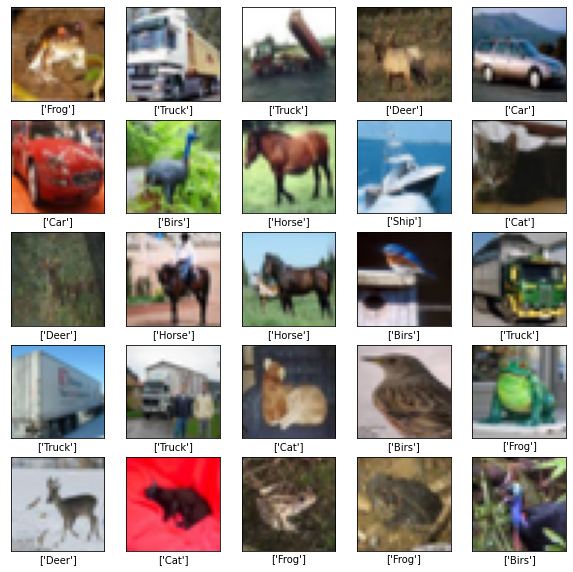

In [28]:
class_names = ['Airplane', 'Car', 'Birs', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse','Ship','Truck']
class_names = np.array(class_names)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [48]:
batch_size = 64
num_classes = 10
epochs = 35

train_images = train_images.astype('float32')
train_images = train_images/255

test_images = test_images.astype('float32')
test_images = test_images/255

test_images

train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)


In [31]:
model = keras.Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape = train_images.shape[1:],
          activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size = (3,3), padding = 'same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(num_classes, activation=tf.nn.softmax)
])

In [32]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [34]:
early_stopping=EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    train_images, train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    shuffle=True,
    callbacks=[early_stopping]
)

Epoch 1/35
1563/1563 [==============================] - 31s 7ms/step - loss: 1.6883 - accuracy: 0.3741 - val_loss: 1.3422 - val_accuracy: 0.5172
Epoch 2/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3718 - accuracy: 0.5043 - val_loss: 1.1470 - val_accuracy: 0.5923
Epoch 3/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2535 - accuracy: 0.5497 - val_loss: 1.0752 - val_accuracy: 0.6223
Epoch 4/35
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1835 - accuracy: 0.5759 - val_loss: 1.0221 - val_accuracy: 0.6440
Epoch 5/35
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1338 - accuracy: 0.5930 - val_loss: 0.9766 - val_accuracy: 0.6593
Epoch 6/35
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0935 - accuracy: 0.6072 - val_loss: 0.9285 - val_accuracy: 0.6818
Epoch 7/35
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0603 - accuracy: 0.6211 - val_loss: 0.9235 - val_accu

In [35]:
loss, acc = model.evaluate(test_images, test_labels)
print('\nLoss : {}, Acc : {}'.format(loss,acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.7798 - accuracy: 0.7352

Loss : 0.7797980904579163, Acc : 0.7351999878883362


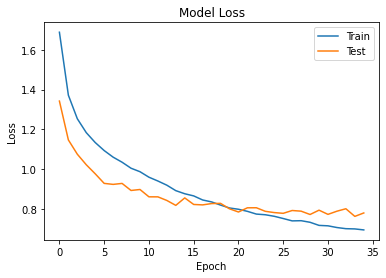

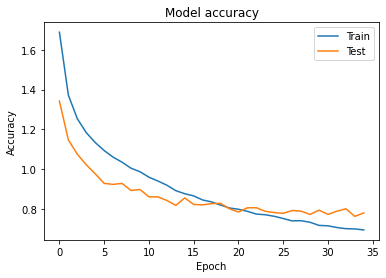

In [42]:
def plot_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
    
def plot_show_acc(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
    
plot_show_loss(history)
plt.show()

plot_show_acc(history)
plt.show()

In [43]:
# 예측
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


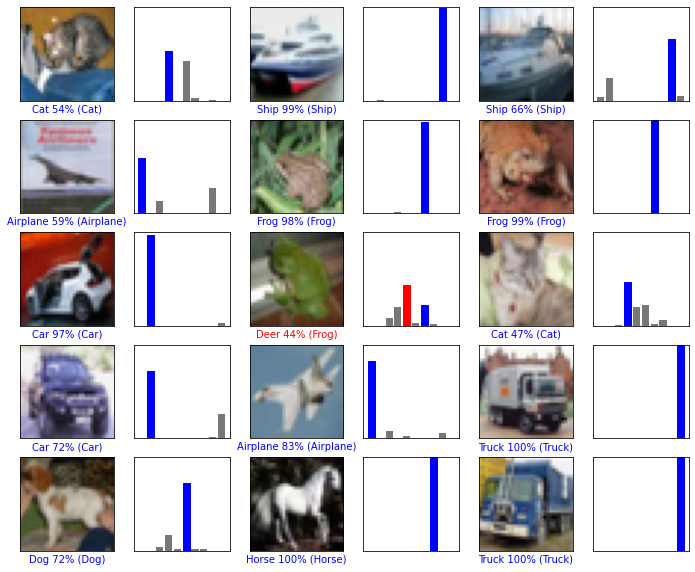

In [46]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[np.argmax(true_label)]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()